<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.135269,61.417641,92.632290,63.118125,-0.045448,258.257876,258.294500,-0.036624
1,0.0,1.0,51.311447,64.945106,25.862470,85.192435,0.028081,237.339539,237.331637,0.007902
2,0.0,2.0,65.559468,71.983148,86.612907,20.325796,-0.028754,254.452565,254.479682,-0.027116
3,0.0,3.0,51.853889,77.483547,77.578725,96.132150,-0.053083,312.995228,313.038512,-0.043283
4,0.0,4.0,27.563254,65.437926,81.594154,23.035971,-0.002279,207.629025,207.636306,-0.007281
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.448761,63.126024,45.251490,97.562130,-0.037306,276.351098,276.384637,-0.033538
59996,999.0,56.0,50.066648,70.927194,42.454932,29.245225,-0.018888,202.675111,202.714379,-0.039268
59997,999.0,57.0,31.948052,25.500384,76.438902,79.098899,0.061375,223.047612,222.987325,0.060287
59998,999.0,58.0,96.535116,87.704977,76.143008,86.656826,-0.007019,357.032908,357.026187,0.006721


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.135269,61.417641,92.632290,63.118125,-0.045448,258.257876,258.294500,-0.036624
1,0.0,1.0,51.311447,64.945106,25.862470,85.192435,0.028081,237.339539,237.331637,0.007902
2,0.0,2.0,65.559468,71.983148,86.612907,20.325796,-0.028754,254.452565,254.479682,-0.027116
3,0.0,3.0,51.853889,77.483547,77.578725,96.132150,-0.053083,312.995228,313.038512,-0.043283
4,0.0,4.0,27.563254,65.437926,81.594154,23.035971,-0.002279,207.629025,207.636306,-0.007281
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.448761,63.126024,45.251490,97.562130,-0.037306,276.351098,276.384637,-0.033538
59996,999.0,56.0,50.066648,70.927194,42.454932,29.245225,-0.018888,202.675111,202.714379,-0.039268
59997,999.0,57.0,31.948052,25.500384,76.438902,79.098899,0.061375,223.047612,222.987325,0.060287
59998,999.0,58.0,96.535116,87.704977,76.143008,86.656826,-0.007019,357.032908,357.026187,0.006721


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.135269,61.417641,92.632290,63.118125,-0.045448,258.257876,258.294500,-0.036624
1,0.0,1.0,51.311447,64.945106,25.862470,85.192435,0.028081,237.339539,237.331637,0.007902
2,0.0,2.0,65.559468,71.983148,86.612907,20.325796,-0.028754,254.452565,254.479682,-0.027116
3,0.0,3.0,51.853889,77.483547,77.578725,96.132150,-0.053083,312.995228,313.038512,-0.043283
4,0.0,4.0,27.563254,65.437926,81.594154,23.035971,-0.002279,207.629025,207.636306,-0.007281
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.448761,63.126024,45.251490,97.562130,-0.037306,276.351098,276.384637,-0.033538
59996,999.0,56.0,50.066648,70.927194,42.454932,29.245225,-0.018888,202.675111,202.714379,-0.039268
59997,999.0,57.0,31.948052,25.500384,76.438902,79.098899,0.061375,223.047612,222.987325,0.060287
59998,999.0,58.0,96.535116,87.704977,76.143008,86.656826,-0.007019,357.032908,357.026187,0.006721


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.135269  61.417641  92.632290  63.118125 -0.045448  258.257876   
      1.0    51.311447  64.945106  25.862470  85.192435  0.028081  237.339539   
      2.0    65.559468  71.983148  86.612907  20.325796 -0.028754  254.452565   
      3.0    51.853889  77.483547  77.578725  96.132150 -0.053083  312.995228   
      4.0    27.563254  65.437926  81.594154  23.035971 -0.002279  207.629025   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   60.448761  63.126024  45.251490  97.562130 -0.037306  276.351098   
      56.0   50.066648  70.927194  42.454932  29.245225 -0.018888  202.675111   
      57.0   31.948052  25.500384  76.438902  79.098899  0.061375  223.047612   
      58.0   96.535116  87.704977  76.143008  86.656826 -0.007019  357.032908   
      59.0   61.946213  49.797575  43.435109  98.229123 -0.037367  263.370653   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    258.294500 -0.036624  
      1.0    237.331637  0.007902  
      2.0    254.479682 -0.027116  
      3.0    313.038512 -0.043283  
      4.0    207.636306 -0.007281  
...                 ...       ...  
999.0 55.0   276.384637 -0.033538  
      56.0   202.714379 -0.039268  
      57.0   222.987325  0.060287  
      58.0   357.026187  0.006721  
      59.0   263.410196 -0.039543  

[60000 rows x 8 columns]

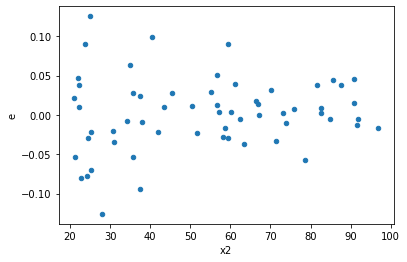

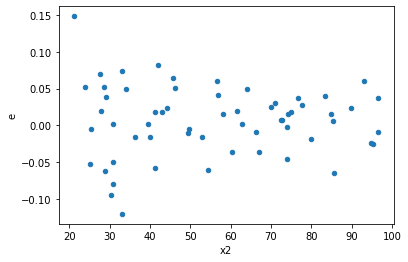

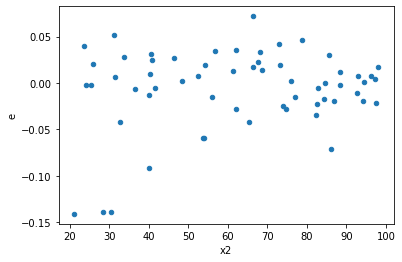

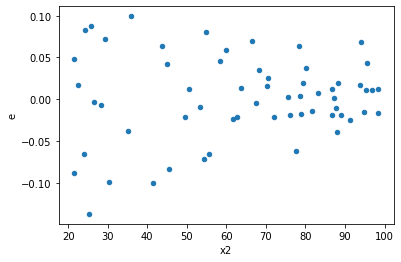

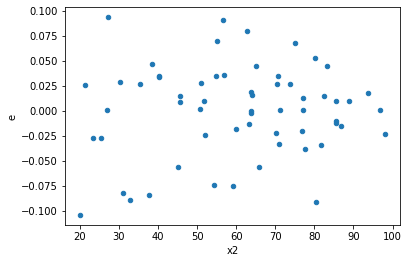

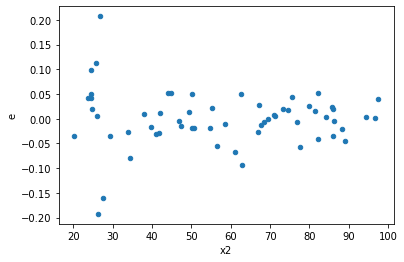

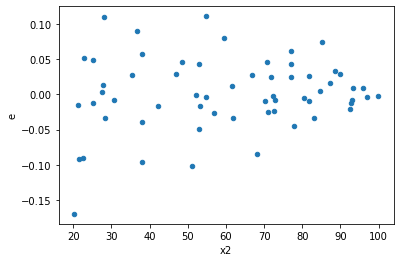

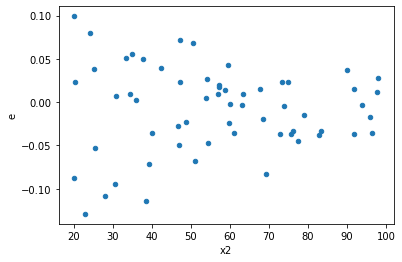

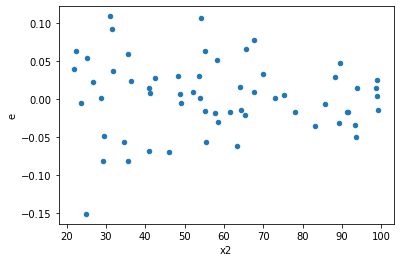

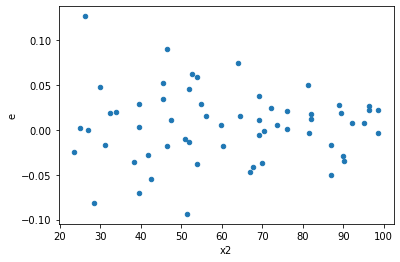

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,20.0,20.0,0.028747955248323707,0.037530877434677715,0.0014373977624161853,0.0018765438717338856,1.3055146743650974,0.5566192508533194,0.7216903745733403,0.2783096254266597,Reject005=1 : Homoscedasticity
10.0,20.0,20.0,0.025861483719889663,0.03591856770524402,0.0012930741859944832,0.001795928385262201,1.3888827143208187,0.4691724189147102,0.7654137905426449,0.2345862094573551,Reject005=1 : Homoscedasticity
12.0,20.0,20.0,0.028748139014083504,0.033075759264304457,0.0014374069507041751,0.0016537879632152227,1.150535665912179,0.7569108355689624,0.6215445822155188,0.3784554177844812,Reject005=1 : Homoscedasticity
21.0,20.0,20.0,0.03306011764329544,0.03907323755395208,0.001653005882164772,0.001953661877697604,1.1818844075370705,0.7122633198570489,0.6438683400714755,0.35613165992852447,Reject005=1 : Homoscedasticity
29.0,20.0,20.0,0.026042645417448673,0.032223155577847024,0.0013021322708724335,0.0016111577788923512,1.2373226706169178,0.6384833689531737,0.6807583155234131,0.31924168447658685,Reject005=1 : Homoscedasticity
32.0,20.0,20.0,0.03267969700773765,0.0361300565796251,0.0016339848503868827,0.001806502828981255,1.1055811371528474,0.8246222567726216,0.5876888716136892,0.4123111283863108,Reject005=1 : Homoscedasticity
46.0,20.0,20.0,0.029666936105924455,0.045350593263281426,0.0014833468052962227,0.0022675296631640713,1.528657799422198,0.3504354913860559,0.824782254306972,0.17521774569302795,Reject005=1 : Homoscedasticity
56.0,20.0,20.0,0.03960419081473198,0.04220052309603609,0.001980209540736599,0.0021100261548018047,1.0655570086875334,0.8884937124519001,0.5557531437740499,0.44424685622595006,Reject005=1 : Homoscedasticity
71.0,20.0,20.0,0.01471946060745686,0.022607875459843933,0.0007359730303728429,0.0011303937729921967,1.5359173860209807,0.3451227865070625,0.8274386067464687,0.17256139325353126,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.038271618780035245,0.013480897119937276,0.0019135809390017622,0.0006740448559968638,0.35224266831821904,0.02409824737024824,Reject005=0 : Heteroscedasticity
1.0,20.0,20.0,0.0306659940753123,0.01320666383016213,0.001533299703765615,0.0006603331915081065,0.43066152682766523,0.06662063565356827,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,0.10355960206669329,0.05992144463727009,0.005177980103334664,0.0029960722318635043,0.5786179498708401,0.2297995757209622,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,0.052729289156435925,0.010587941807539317,0.0026364644578217964,0.0005293970903769658,0.20079811385522905,0.0007234400364429077,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,0.04673003074301543,0.029686824635150315,0.0023365015371507717,0.0014843412317575157,0.6352836529983985,0.31843550163097845,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,0.07794502557072824,0.034192205609510036,0.0038972512785364123,0.0017096102804755018,0.43867078571272805,0.0726266361427883,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,0.062303834818899215,0.011953562026597121,0.0031151917409449606,0.0005976781013298561,0.191859169846334,0.0005245395911031964,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,0.028747955248323707,0.037530877434677715,0.0014373977624161853,0.0018765438717338856,1.3055146743650974,0.5566192508533194,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,0.05642108515555027,0.02854892782920178,0.0028210542577775137,0.001427446391460089,0.5059974963348141,0.13613159588583787,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      623
Reject005=0 : Heteroscedasticity    377
Name: Result_test, dtype: int64